In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the .txt file
data = np.loadtxt('tb_layer_input.txt', skiprows=1)  # Adjust 'data.txt' to your filename

# Store each column into separate vectors
time = data[:, 0]
vin = data[:, 1]
N1 = data[:, 2]
N2 = data[:, 3]
N3 = data[:, 4]
N4 = data[:, 5]


In [69]:
def getFrecAvg(time, N):
    clock = [1 if N[i]>1.7 else 0 for i in range(len(time)) ]
    # Find rising edges (where clock goes from 0 to 1)
    rising_edges = []
    for i in range(1, len(clock)):
        if clock[i] == 1 and clock[i - 1] == 0:
            rising_edges.append(time[i])
    
    # Calculate periods based on rising edges
    periods = []
    
    for i in range(1, len(rising_edges)):
        period = rising_edges[i] - rising_edges[i - 1]
        periods.append(period)
    
    avgfrec = 0
    if len(periods)>0:
        avgfrec = 1/np.mean(periods)

    return avgfrec

In [70]:
num_slices = 27
slice = int(len(time) / num_slices)
N1_frec_avgs = [0]
N2_frec_avgs = [0]
N3_frec_avgs = [0]
N4_frec_avgs = [0]
time_periods = [0]
vin_periods = [0]
for x in range(num_slices):
    lim_low = x * slice
    lim_up = lim_low + slice
    time_slice = time[lim_low:lim_up]
    vin_slice = vin[lim_low:lim_up]
    N1_slice = N1[lim_low:lim_up]
    N2_slice = N2[lim_low:lim_up]
    N3_slice = N3[lim_low:lim_up]
    N4_slice = N4[lim_low:lim_up]
    time_periods.append(time[lim_up])
    vin_periods.append(vin[lim_up])
    N1_frec_avgs.append(getFrecAvg(time_slice, N1_slice))
    N2_frec_avgs.append(getFrecAvg(time_slice, N2_slice))
    N3_frec_avgs.append(getFrecAvg(time_slice, N3_slice))
    N4_frec_avgs.append(getFrecAvg(time_slice, N4_slice))


N1_frec_avgs.pop(0)
N2_frec_avgs.pop(0)
N3_frec_avgs.pop(0)
N4_frec_avgs.pop(0)
time_periods.pop(0)
vin_periods.pop(0)



0

Text(0.5, 1.0, 'Tuning Curve, but with VCCS(vin)')

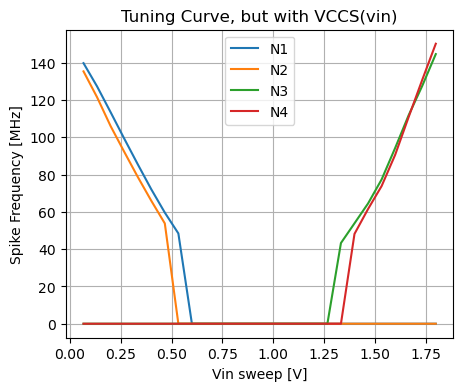

In [71]:
fig, ax = plt.subplots(1,figsize=[5,4])
ax.plot(vin_periods, np.array(N1_frec_avgs)/1000,label="N1")
ax.plot(vin_periods, np.array(N2_frec_avgs)/1000,label="N2")
ax.plot(vin_periods, np.array(N3_frec_avgs)/1000,label="N3")
ax.plot(vin_periods, np.array(N4_frec_avgs)/1000,label="N4")
# ax.plot(vin_periods, N1_frec_avgs,label="N1")
# ax.plot(vin_periods, N2_frec_avgs,label="N2")
# ax.plot(vin_periods, N3_frec_avgs,label="N3")
# ax.plot(vin_periods, N4_frec_avgs,label="N4")
ax.legend()
ax.grid()
ax.set_xlabel("Vin sweep [V]")
ax.set_ylabel("Spike Frequency [MHz]")
ax.set_title("Tuning Curve, but with VCCS(vin)")

Text(0.5, 1.0, 'Neural activity of the layer')

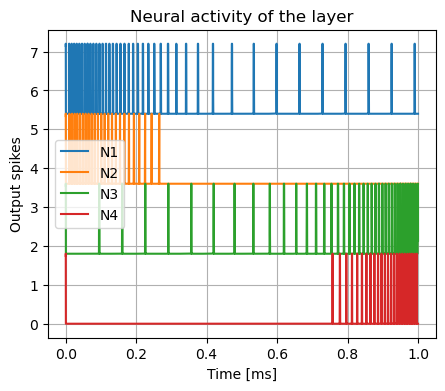

In [72]:
fig, ax = plt.subplots(1,figsize=[5,4])
ax.plot(time*1000, N1+1.8*3,label="N1")
ax.plot(time*1000, N2+1.8*2,label="N2")
ax.plot(time*1000, N3+1.8*1,label="N3")
ax.plot(time*1000, N4,label="N4")
ax.legend()
ax.grid()
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Output spikes")
ax.set_title("Neural activity of the layer")